# Computational Experiment 2: Generating Random Distributions

Discussion: 23 September 2021 (Parts 1 to 4: Annelia; Parts 5 to 8: Praphull)

In this experiment you will use transformation of probability to generate arbitrary distributions of random numbers, and then use the same technique to generate density distrubutions.

Before you begin, **make sure to read through the full notebook and understand what each function does**. Pay special attention to anything that has a **FIXME** note, which you will need to edit. Also, in addition to all of the packages from Experiment 1, install ``pynbody`` from [here](https://pynbody.github.io/pynbody/).

Before you do anything else, read the [Transformation of Probability Tuturial](https://github.com/jbailinua/probability/blob/master/Transformation%20of%20Probability%20-%20Generating%20Distributions.ipynb). Make sure you understand it, and talk to me about anything you don't understand before you proceed. Note that there's lots of code there that you might find useful - **please borrow code liberally from it!**

## 0. Import packages

In [3]:
import numpy as np
from numpy.random import random
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import pynbody as pyn

## 1. Generate numbers from a random distribution

For the first case, you will generate 2000 random numbers that have the following distribution:

$$ P(y) \propto \left\{ \begin{array}{l@{\quad}l} \sqrt{y-a} & a \le y < 10 \\ 0 & \textrm{otherwise} \\ \end{array} \right. $$

Go through steps 1-3 from the tutorial, and determine the appropriate transformation.

**FIXME:** Now edit the following code to generate the random numbers. Use $a=1$ to start.


In [4]:
# Generate 2000 random numbers with a simple analytic function.
# Number of numbers to generate:
N = 2000

# Generate N uniform random deviates
xi = random(N)

# FIXME: Transform xi into y
# NOTE: If you have fractions like 2/3, make sure that you write them
# as 2./3. so they are interpreted as reals, not integers!
# To a computer 2./3. = 0.666666...  but 2/3 = 0 !
a = 1.0
y = a + ((10.0 - a) * xi**(2./3.))

Now make a histogram of them to see if it looks like you expect.

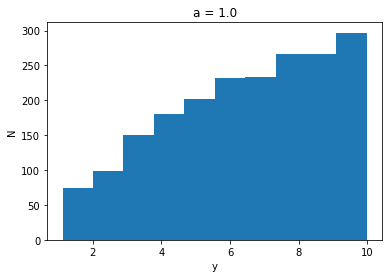

In [5]:
# Plot a histogram of y
histy_N, histy_y, histy_p = plt.hist(y)
plt.xlabel('y')
plt.ylabel('N')
plt.title('a = {0}'.format(a))  # This title will be useful later when you try different values of a
# FIXME: CHANGE THIS TO CHANGE THE FILE NAME
plt.savefig('exp2-A-a{0}.pdf'.format(a))

Look at it! Does this appear to have the right functional form?

## 2. Compare with the pdf

This might look fine, but we want to check that it actually worked by overplotting the correct pdf.

To do this, we need to make sure the normalization makes sense given the number of random numbers and the width of the histogram bins. Consider that for a properly normalized pdf (which you used in your transformation), the fraction between $y$ and $y + dy$ is $P(y)$, and the total is 1. If you have a histogram with bins of width $\Delta y$ and a total of $N$, what do you need to multiply $P(y)$ by to match the histogram height?

Let's make a new histogram that has the correctly-normalized $P(y)$ overplotted.

**FIXME:** Put your renormalized ``Py`` in the appropriate place.

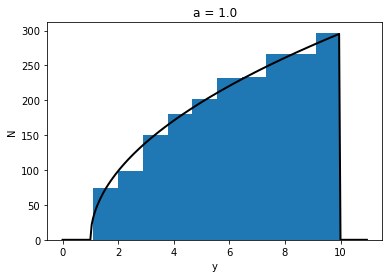

In [6]:
# Plot a histogram of y
histy_N, histy_y, histy_p = plt.hist(y)
plt.xlabel('y')
plt.ylabel('N')
plt.title('a = {0}'.format(a))

# histy_y gives the y values of the edge points of the histogram bins, so we can use
# them to determine the width of the bin that plt.hist chose... let's just subtract
# the first value (histy_y[0] since Python is 0-indexed) from the second value.
binwidth = histy_y[1] - histy_y[0]

# To plot P(y), we need an array of y values. This creates an array of values from 0 to
# 11 spaced 0.05 apart. This is the variable we should use when plotting Py.
yax = np.arange(0, 11, 0.05)

# FIXME: Put the correctly-normalized P(yax) here, taking into account N and binwidth.
# NOTE!! Because P(y) is disjointed (it has a different definition at a<y<10 than
# outside), we need to define it somewhat carefully. To do this, we create an array
# of Boolean (True/False) values that tells us what values of yax are between a and 10,
# and then only use those indices. The steps are:
#   1. Create the Boolean array yax_is_between_a_and_10.
#   2. Use Py[yax_is_between_a_and_10] and yax[yax_is_between_a_and_10] in the subsequent
#      equation.
# For Part 4, you should just use Py and yax on their own, unless your PDF is defined
# only over a certain range like this one.
yax_is_between_a_and_10 = (a < yax) * (yax < 10)

Py = np.zeros_like(yax)  # This creates an array of zeros that has the same length as yax

Py[yax_is_between_a_and_10] = (3./2.) * (10-a)**(-3./2.) * (yax[yax_is_between_a_and_10]-a)**(1./2.) * N * binwidth

plt.plot(yax, Py, linewidth=2, color='black')

# FIXME: Change this to change the file name.
plt.savefig('exp2-B-a{0}.pdf'.format(a))

Look at the plot. Do the histograms and expected $P(y)$ match? Look *quantitatively* at how much the histogram scatters around the analytic curve -- what is the typical scale of discrepancy? How much scatter *quantitatively* would you expect from simple statistics? How do they compare?

## 3. Effects of the parameter values

**FIXME:** Go back and do Parts 2 and 3 using at least two different values of $a$. How does the value of $a$ change the pdf? What range of values of $a$ are possible for this pdf?

## 4. Inverting the equation using numerical interpolation

Find a pdf that has no analytic solution for the inversion step. You can use an analytic pdf that has no closed form solution -- or even better, find some empirical distribution to recreate. For example, maybe you can find a data set related to your research -- make a mock galaxy survey that has the same redshift distribution as SDSS, or a mock set of X-ray events that match an observed X-ray spectrum, or a set of stars that have the color distribution as the stars in a globular cluster.

**FIXME:** Either code the functional form of the CDF or load in data and use it to create the CDF.

In [7]:
# FIXME: LOAD YOUR DATA IF APPROPRIATE

In [ ]:
# FIXME: DEFINE YOUR CDF
cdf_x = #FIXME
cdf_y = #FIXME

In [ ]:
# Plot the CDF
plt.plot(cdf_x, cdf_y)
plt.xlabel('FIXME: PUT A SENSIBLE LABEL HERE')
plt.ylabel('CDF')
plt.savefig('exp2-C-cdf.pdf')

In [12]:
# Relevant range of a
a_sample = np.arange(-0.2,2.2,0.01)
# Transform to xi
xi_sample = (a_sample + np.exp(a_sample) - 1.0)/(1.0 + np.exp(2.0))

Text(0, 0.5, '$\\xi$')

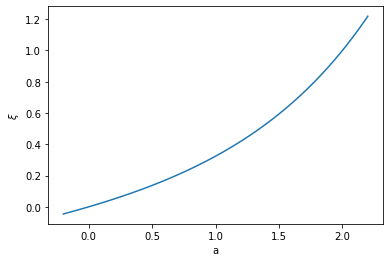

In [13]:
# Plot the relationship
plt.plot(a_sample, xi_sample)
plt.xlabel('a')
plt.ylabel('$\\xi$')

Text(0, 0.5, 'a')

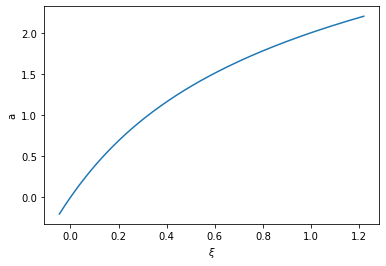

In [14]:
plt.plot(xi_sample, a_sample)
plt.xlabel('$\\xi$')
plt.ylabel('a')

Look at the CDF. What features do you see? What does it mean when the CDF is steep vs. shallow?

Now use it to create your random sample.

In [15]:
# Use interp1d to create an interpolation function.
x_from_xi = interp1d(xi_sample, a_sample, bounds_error=False)

In [16]:
# Create 5000 samples from a uniform random deviate.
# FIXME: You might want to use more depending on the pdf you are trying to reproduce.
N = 5000
xi = random(N)
# Transform them
x = x_from_xi(xi)

Now let's plot the $\xi$ distribution and the transformed distribution.

**FIXME:** Make sure to overplot the pdf you were trying to reproduce. If you are reproducing an empirical distribution, you will probably find the ``numpy.histogram`` function useful as noted in the comments.

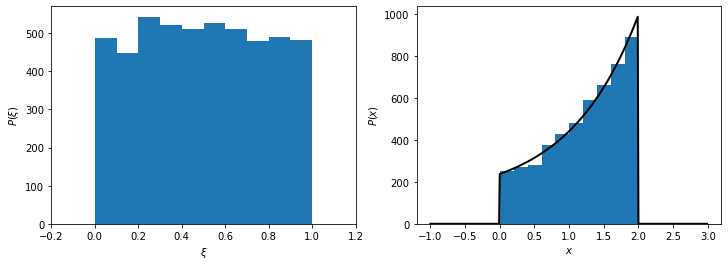

In [17]:
# Plot histograms of xi and the transformed value
fig = plt.figure()
figsize = fig.get_size_inches()
figsize[0] *= 2
fig.set_size_inches(figsize)
ax1 = fig.add_subplot(121)
ax1.hist(xi)
ax1.set_xlabel('$\\xi$')
ax1.set_ylabel('$P(\\xi)$')
ax1.set_xlim(-0.2,1.2)
ax2 = fig.add_subplot(122)

# FIXME: If you want to change the histogram binning to have bins of width "binwidth" between "low" and "high",
# then replace the hist() call with hist(x, bins=np.arange(low, high, binwidth))
hist_N, hist_y, hist_p = ax2.hist(x)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$P(x)$')

binwidth = hist_y[1] - hist_y[0]

# FIXME: OVERPLOT THE PDF YOU WERE TRYING TO REPRODUCE AS IN PART 2
# If you are reproducing an empirical distribution, the following technique is helpful. If your data is in
# the variable "data", and you want bins of width "binwidth" between "low" and "high", then try
# xax = np.arange(low, high, binwidth)
# Px = np.histogram(data, bins=xax, density=True)[0] * binwidth * N
# If you do that you will also need to replace xax in the subsequent plot command with xax[:-1]
xax = np.arange(-1, 3, 0.01) # FIXME: USE np.arange WITH APPROPRIATE VALUES FOR YOUR PDF

xax_is_between_0_and_2 = (0 < xax) * (xax < 2)

Px = np.zeros_like(xax)  # This creates an array of zeros that has the same length as yax

Px[xax_is_between_0_and_2] = (1 + np.exp(xax[xax_is_between_0_and_2])) / (1 + np.exp(2)) * N * binwidth # FIXME: YOUR PDF

ax2.plot(xax, Px, linewidth=2, color='black')

plt.savefig('exp2-C-pdf.pdf')

## 5. Generate a spherically-symmetric density distribution

Now let's create a sample of points in 3D that have a desired density distribution:

$$ \rho(r) \propto r^{-2} \, e^{-r/r_c} $$

Determine approprate pdfs for the three spherical coordinates, i.e. $P(r)$, $P(\theta)$, and $P(\phi)$. Then derive appropriate transformations for each from a uniform random deviate $\xi$.

**FIXME:** Implement that transformation here. Assume $r_c=100$ for now.

In [18]:
# Generate a 3D density distribution with 5000 points
N = 5000

# We need 3 random deviates, one for each spherical coordinate
xi_r = random(N)
xi_theta = random(N)
xi_phi = random(N)

# FIXME: Transform them to find r, theta, and phi. Use xi_r for r, xi_theta for theta,
# and xi_phi for phi.
rc = 100.0
r = rc * np.log(xi_r) #FIXME
theta = np.arccos(-2.0 * xi_theta + 1.0) #FIXME
phi = 2.0 * np.pi * xi_phi #FIXME

To turn these into 3D particle positions, we will transform them into Cartesian coordinates and create a ``pynbody`` snapshot to hold them, so we can use its fancy plotting routines that can automatically create density profiles.

In [19]:
# Transform to Cartesian coordinates. Note that this uses the convention that the polar
# angle theta runs from 0 to pi, so the volume element is r^2 sin(theta) dr dtheta dphi
x = r * np.sin(theta) * np.cos(phi)
y = r * np.sin(theta) * np.sin(phi)
z = r * np.cos(theta)

# This will create a pynbody snapshot containing these particles, so we can use
# the analysis routines built into pynbody, such as to calculate density profiles.
sim = pyn.new(N)

# Set positions
sim['pos'] = pyn.array.SimArray([x,y,z]).T

# We need masses. Set to an array of ones.
sim['mass'] = pyn.array.SimArray(np.ones(N))

In [20]:
# Create a Profile object that we can use to automatically calculate density profiles.
# ndim=3 means use spherical shells and calculate 3D density.
# Once we've done this, we can access many different quantities in radial bins. The radius of the bins are
# given by prof['rbins'], the densities in prof['density'], etc. See the pynbody
# documentation online for a full list of quantities.
prof = pyn.analysis.profile.Profile(sim, ndim=3)

Plot the particle distribution in the three Cartesian projections.

In [21]:
# FIXME: Change this to zoom in or out, especially when you change rc.
panelsize = 300.0

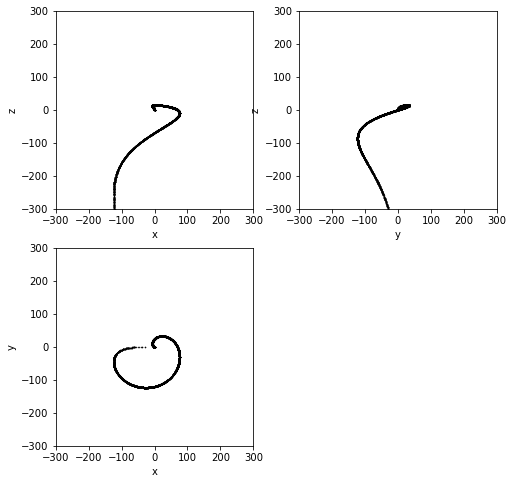

In [22]:
plt.figure(figsize=(8,8))
ax_xz = plt.subplot(221, aspect=1.0)
ax_xy = plt.subplot(223, aspect=1.0)
ax_yz = plt.subplot(222, aspect=1.0)

# x vs y scatter plot
ax_xy.scatter(x, y, color='black', s=0.2)
ax_xy.set_xlabel('x')
ax_xy.set_ylabel('y')
ax_xy.set_xlim(-panelsize, panelsize)
ax_xy.set_ylim(-panelsize, panelsize)

# x vs z scatter plot
ax_xz.scatter(x, z, color='black', s=0.2)
ax_xz.set_xlabel('x')
ax_xz.set_ylabel('z')
ax_xz.set_xlim(-panelsize, panelsize)
ax_xz.set_ylim(-panelsize, panelsize)

# y vs z scatter plot
ax_yz.scatter(y, z, color='black', s=0.2)
ax_yz.set_xlabel('y')
ax_yz.set_ylabel('z')
ax_yz.set_xlim(-panelsize, panelsize)
ax_yz.set_ylim(-panelsize, panelsize)

# FIXME: Change this to change file name
plt.savefig('exp2-D-particles.pdf')

Also plot the radial density profile.

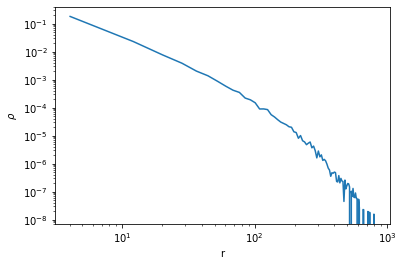

In [23]:
# radial density profile
ax_dens = plt.subplot(111)
ax_dens.plot(prof['rbins'], prof['density'])
ax_dens.set_xlabel('r')
ax_dens.set_ylabel('$\\rho$')

# Set logarithmic axes
ax_dens.set_xscale('log')
ax_dens.set_yscale('log')

# FIXME: Change this to change file name
plt.savefig('exp2-D-density.pdf')

Look at these! Do they look like you expect? How does the density behave at small radius -- does it have the correct logarithmic slope? How does the density behave at large radius?

## 6. Investigate the parameters and implementation

First, try changing the value of $r_c$ (note that you might need to change the ``panelsize`` variable to see what's going on). How does the particle distribution change? How does the density profile change? What is the physical meaning of $r_c$?

Now, I want to draw your attention to the fact that we used three separate random deviates in the code, one for each spherical coordinate. Why? Try changing it so that you use the same random deviate for all three variables (i.e. use ``xi_r`` in all three transformations). What happens to the particle distribution? What happens to the density distribution? Why?

## 7. Axisymmetric disk density distribution

Create an axisymmetric density distribution corresponding to a disk whose density is exponential in both radius and height (this is a good approximation to a galactic disk!):

$$ \rho(R,z) \propto e^{-R/R_s} \, e^{-|z|/z_h} $$

Determine the appropriate pdfs for the 3 cylindrical coordinates $P(R)$, $P(\phi)$, and $P(z)$, and the transformations. Start off with $R_s=2.0$ and $z_h=0.2$ (called ``Rscale`` and ``zscale`` in the code).

For the $R$ distribution, you will need to use interpolation. Think carefully about the range over which you create your interpolation function. Be prepared to discuss your choice.

For the $z$ distribution, you will find it easiest to do it in two steps: first create a random distribution in $|z|$, and then multiply that by a random variable that is equally likely to be +1 or -1 (hint: ``xi_zplusminus`` as defined in the code gives you a random deviate that's equally likely to be positive or negative, so you just need to figure out how to make that +1 or -1).

**FIXME:** Implement your transformations here.

In [541]:
# Generate an axisymmetric density distribution with 5000 points
N = 5000

# Use 4 random deviates, one for each cylindrical coordinate plus an extra one
# to signify whether z ends up positive or negative.
xi_R = random(N)
xi_phi = random(N)
xi_absz = random(N)
xi_zplusminus = random(N)-0.5

for i in range(len(xi_zplusminus)):
    if xi_zplusminus[i] < 0:
        xi_zplusminus[i] = -1
    else:
        xi_zplusminus[i] = 1
        
# FIXME: Transform them to find R, phi, and z. Use xi_R for R, xi_phi for phi,
# and xi_absz and xi_zplusminus for z.
Rscale = 2.0
zscale = 0.2
R = -Rscale * np.log(xi_R) # FIXME
phi = 2 * np.pi * xi_phi # FIXME
z = -zscale * np.log(xi_absz) * xi_zplusminus # FIXME

To visualize them we again need to transform to Cartesian coordinates and place them in a ``pynbody`` snapshot.

In [542]:
# Transform to Cartesian coordinates.
x = R * np.cos(phi)
y = R * np.sin(phi)
z = z  # redundant but left in for symmetry

# This will create a pynbody snapshot containing these particles, so we can use
# the analysis routines built into pynbody, such as to calculate density profiles.
sim = pyn.new(N)

# Set positions
sim['pos'] = pyn.array.SimArray([x,y,z]).T

# We need masses. Set to an array of ones.
sim['mass'] = pyn.array.SimArray(np.ones(N))

# Create a Profile object that we can use to automatically calculate density profiles.
# ndim=2 means use cylinders and calculate 2D surface density.
# Once we've done this, we can access many different quantities in bins of radius.
# The radius of the bins are given by prof['rbins'], the densities in prof['density'], etc.
# See the pynbody documentation online for a full list of quantities.
prof = pyn.analysis.profile.Profile(sim, ndim=2)

# Create a vertical profile to access the quantities as a function of height.
# The three numbers are the minimum radius to include, the maximum radius to include,
# and the maximum height to go to.
# Somewhat confusingly, access the z coordinate of the profile using vertprof['rbins'].
vertprof = pyn.analysis.profile.VerticalProfile(sim, 0., 6.*Rscale, 6.*zscale)

Plot the particle distributions in the three Cartesian projections.

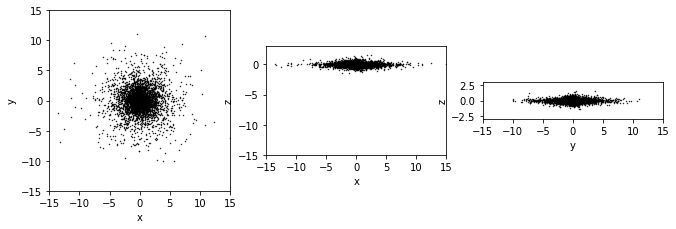

In [543]:
# FIXME: Change this to zoom in or out.
panelsize = 15.0

# Plot xy, xz, and yz scatter plots, along with density profiles.
# Use aspect=1.0 for positions to make sure squares stay square.
plt.figure(figsize=(11,4))
ax_xy = plt.subplot(131, aspect=1.0)
ax_xz = plt.subplot(132, aspect=1.0)
ax_yz = plt.subplot(133, aspect=1.0)

# x vs y scatter plot
ax_xy.scatter(x, y, color='black', s=0.2)
ax_xy.set_xlabel('x')
ax_xy.set_ylabel('y')
ax_xy.set_xlim(-panelsize, panelsize)
ax_xy.set_ylim(-panelsize, panelsize)

# x vs z scatter plot
ax_xz.scatter(x, z, color='black', s=0.2)
ax_xz.set_xlabel('x')
ax_xz.set_ylabel('z')
ax_xz.set_xlim(-panelsize, panelsize)
ax_xz.set_ylim(-panelsize, 0.2*panelsize)

# y vs z scatter plot
ax_yz.scatter(y, z, color='black', s=0.2)
ax_yz.set_xlabel('y')
ax_yz.set_ylabel('z')
ax_yz.set_xlim(-panelsize, panelsize)
ax_yz.set_ylim(-0.2*panelsize, 0.2*panelsize)

# FIXME: Change this to change the file name
plt.savefig('exp2-F-particles-Rs{0}-zh{1}.pdf'.format(Rscale, zscale))

Plot the radial surface density profile and the vertical density profile.

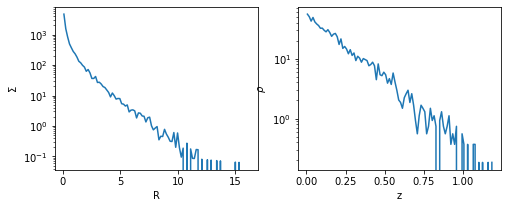

In [544]:
fig = plt.figure(figsize=(8,3))
ax_raddens = fig.add_subplot(121)
ax_vertdens = fig.add_subplot(122)

# radial density profile
ax_raddens.plot(prof['rbins'], prof['density'])
ax_raddens.set_xlabel('R')
ax_raddens.set_ylabel('$\\Sigma$')

# Set logarithmic axis
ax_raddens.set_yscale('log')

# vertical density profile
ax_vertdens.plot(vertprof['rbins'], vertprof['density'])
ax_vertdens.set_xlabel('z')
ax_vertdens.set_ylabel('$\\rho$')

# Set logarithmic axis
ax_vertdens.set_yscale('log')

# FIXME: Change this to change file name
plt.savefig('exp2-F-profiles-Rs{0}-zh{1}.pdf'.format(Rscale, zscale))

Look at them! Do the density profiles have the correct behavior? How far out do you go in radius before you run out of particles? How about in height?

Change $R_s$ and/or $z_h$. How does the particle distribution change? How do the density profiles change? What is the physical meaning of those parameters?

## 8. Do something interesting

Create some different spherically-symmetric or axisymmetric density distribution and make the same plots as Part 5 or Part 7. Feel free to try density profiles that are not physically realistic!

**Everyone please bring your plots**, not just the discussion leader!

$$ \rho(r) \propto r^{-2} \, e^{-2r/r_c + r} $$

In [35]:
# Generate a 3D density distribution with 5000 points
N = 5000

# We need 3 random deviates, one for each spherical coordinate
xi_r_new = random(N)
xi_theta_new = random(N)
xi_phi_new = random(N)

# FIXME: Transform them to find r, theta, and phi. Use xi_r for r, xi_theta for theta,
# and xi_phi for phi.
rc_new = 100.0
r_new = ((-2 / rc_new) - 1)**(-1) * np.log(xi_r_new) #FIXME
theta_new = np.arccos(-2.0 * xi_theta_new + 1.0) #FIXME
phi_new = 2.0 * np.pi * xi_phi_new #FIXME

In [39]:
# Transform to Cartesian coordinates. Note that this uses the convention that the polar
# angle theta runs from 0 to pi, so the volume element is r^2 sin(theta) dr dtheta dphi
x = r_new * np.sin(theta_new) * np.cos(phi_new)
y = r_new * np.sin(theta_new) * np.sin(phi_new)
z = r_new * np.cos(theta_new)

# This will create a pynbody snapshot containing these particles, so we can use
# the analysis routines built into pynbody, such as to calculate density profiles.
sim_new = pyn.new(N)

# Set positions
sim_new['pos'] = pyn.array.SimArray([x,y,z]).T

# We need masses. Set to an array of ones.
sim_new['mass'] = pyn.array.SimArray(np.ones(N))

In [40]:
# Create a Profile object that we can use to automatically calculate density profiles.
# ndim=3 means use spherical shells and calculate 3D density.
# Once we've done this, we can access many different quantities in radial bins. The radius of the bins are
# given by prof['rbins'], the densities in prof['density'], etc. See the pynbody
# documentation online for a full list of quantities.
prof = pyn.analysis.profile.Profile(sim, ndim=3)

In [46]:
# FIXME: Change this to zoom in or out, especially when you change rc.
panelsize = 10.0

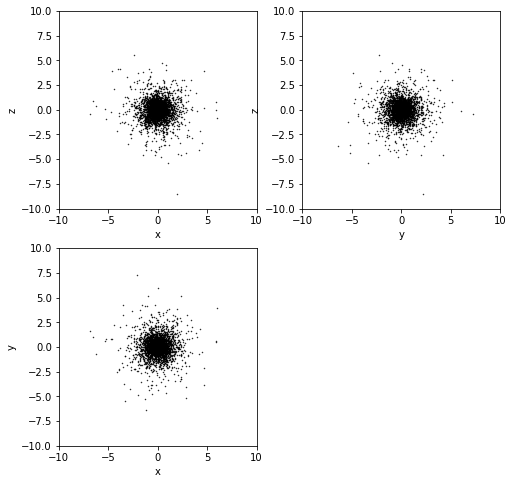

In [47]:
plt.figure(figsize=(8,8))
ax_xz = plt.subplot(221, aspect=1.0)
ax_xy = plt.subplot(223, aspect=1.0)
ax_yz = plt.subplot(222, aspect=1.0)

# x vs y scatter plot
ax_xy.scatter(x, y, color='black', s=0.2)
ax_xy.set_xlabel('x')
ax_xy.set_ylabel('y')
ax_xy.set_xlim(-panelsize, panelsize)
ax_xy.set_ylim(-panelsize, panelsize)

# x vs z scatter plot
ax_xz.scatter(x, z, color='black', s=0.2)
ax_xz.set_xlabel('x')
ax_xz.set_ylabel('z')
ax_xz.set_xlim(-panelsize, panelsize)
ax_xz.set_ylim(-panelsize, panelsize)

# y vs z scatter plot
ax_yz.scatter(y, z, color='black', s=0.2)
ax_yz.set_xlabel('y')
ax_yz.set_ylabel('z')
ax_yz.set_xlim(-panelsize, panelsize)
ax_yz.set_ylim(-panelsize, panelsize)

# FIXME: Change this to change file name
plt.savefig('exp2-G-particles.pdf')

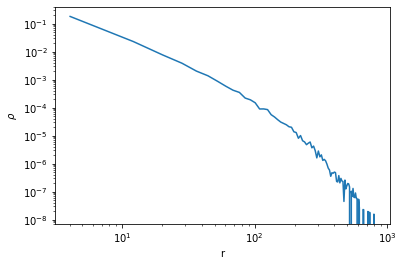

In [48]:
# radial density profile
ax_dens = plt.subplot(111)
ax_dens.plot(prof['rbins'], prof['density'])
ax_dens.set_xlabel('r')
ax_dens.set_ylabel('$\\rho$')

# Set logarithmic axes
ax_dens.set_xscale('log')
ax_dens.set_yscale('log')

# FIXME: Change this to change file name
plt.savefig('exp2-G-density.pdf')